In [12]:
import cv2
import numpy as np
from IPython.display import Image

In [13]:
def readImagesAndTimes():
  
  times = np.array([ 1/30.0, 0.25, 2.5, 15.0 ], dtype=np.float32)
  
  filenames = ["img_0.033.jpg", "img_0.25.jpg", "img_2.5.jpg", "img_15.jpg"]

  images = []
  for filename in filenames:
    im = cv2.imread(filename)
    images.append(im)
  
  return images, times

if __name__ == '__main__':
  # Read images and exposure times
  print("Reading images ... ")

  images, times = readImagesAndTimes()

Reading images ... 


In [14]:
  # Align input images
  print("Aligning images ... ")
  alignMTB = cv2.createAlignMTB()
  alignMTB.process(images, images)

Aligning images ... 


In [15]:
  # Obtain Camera Response Function (CRF)
  print("Calculating Camera Response Function (CRF) ... ")
  calibrateDebevec = cv2.createCalibrateDebevec()
  responseDebevec = calibrateDebevec.process(images, times)

Calculating Camera Response Function (CRF) ... 


In [16]:
  # Merge images into an HDR linear image
  print("Merging images into one HDR image ... ")
  mergeDebevec = cv2.createMergeDebevec()
  hdrDebevec = mergeDebevec.process(images, times, responseDebevec)

Merging images into one HDR image ... 


In [17]:
  # Save HDR image.
  cv2.imwrite("hdrDebevec.hdr", hdrDebevec)
  print("saved hdrDebevec.hdr ")

saved hdrDebevec.hdr 


Tonemaping using Drago's method ... 
saved ldr-Drago.jpg


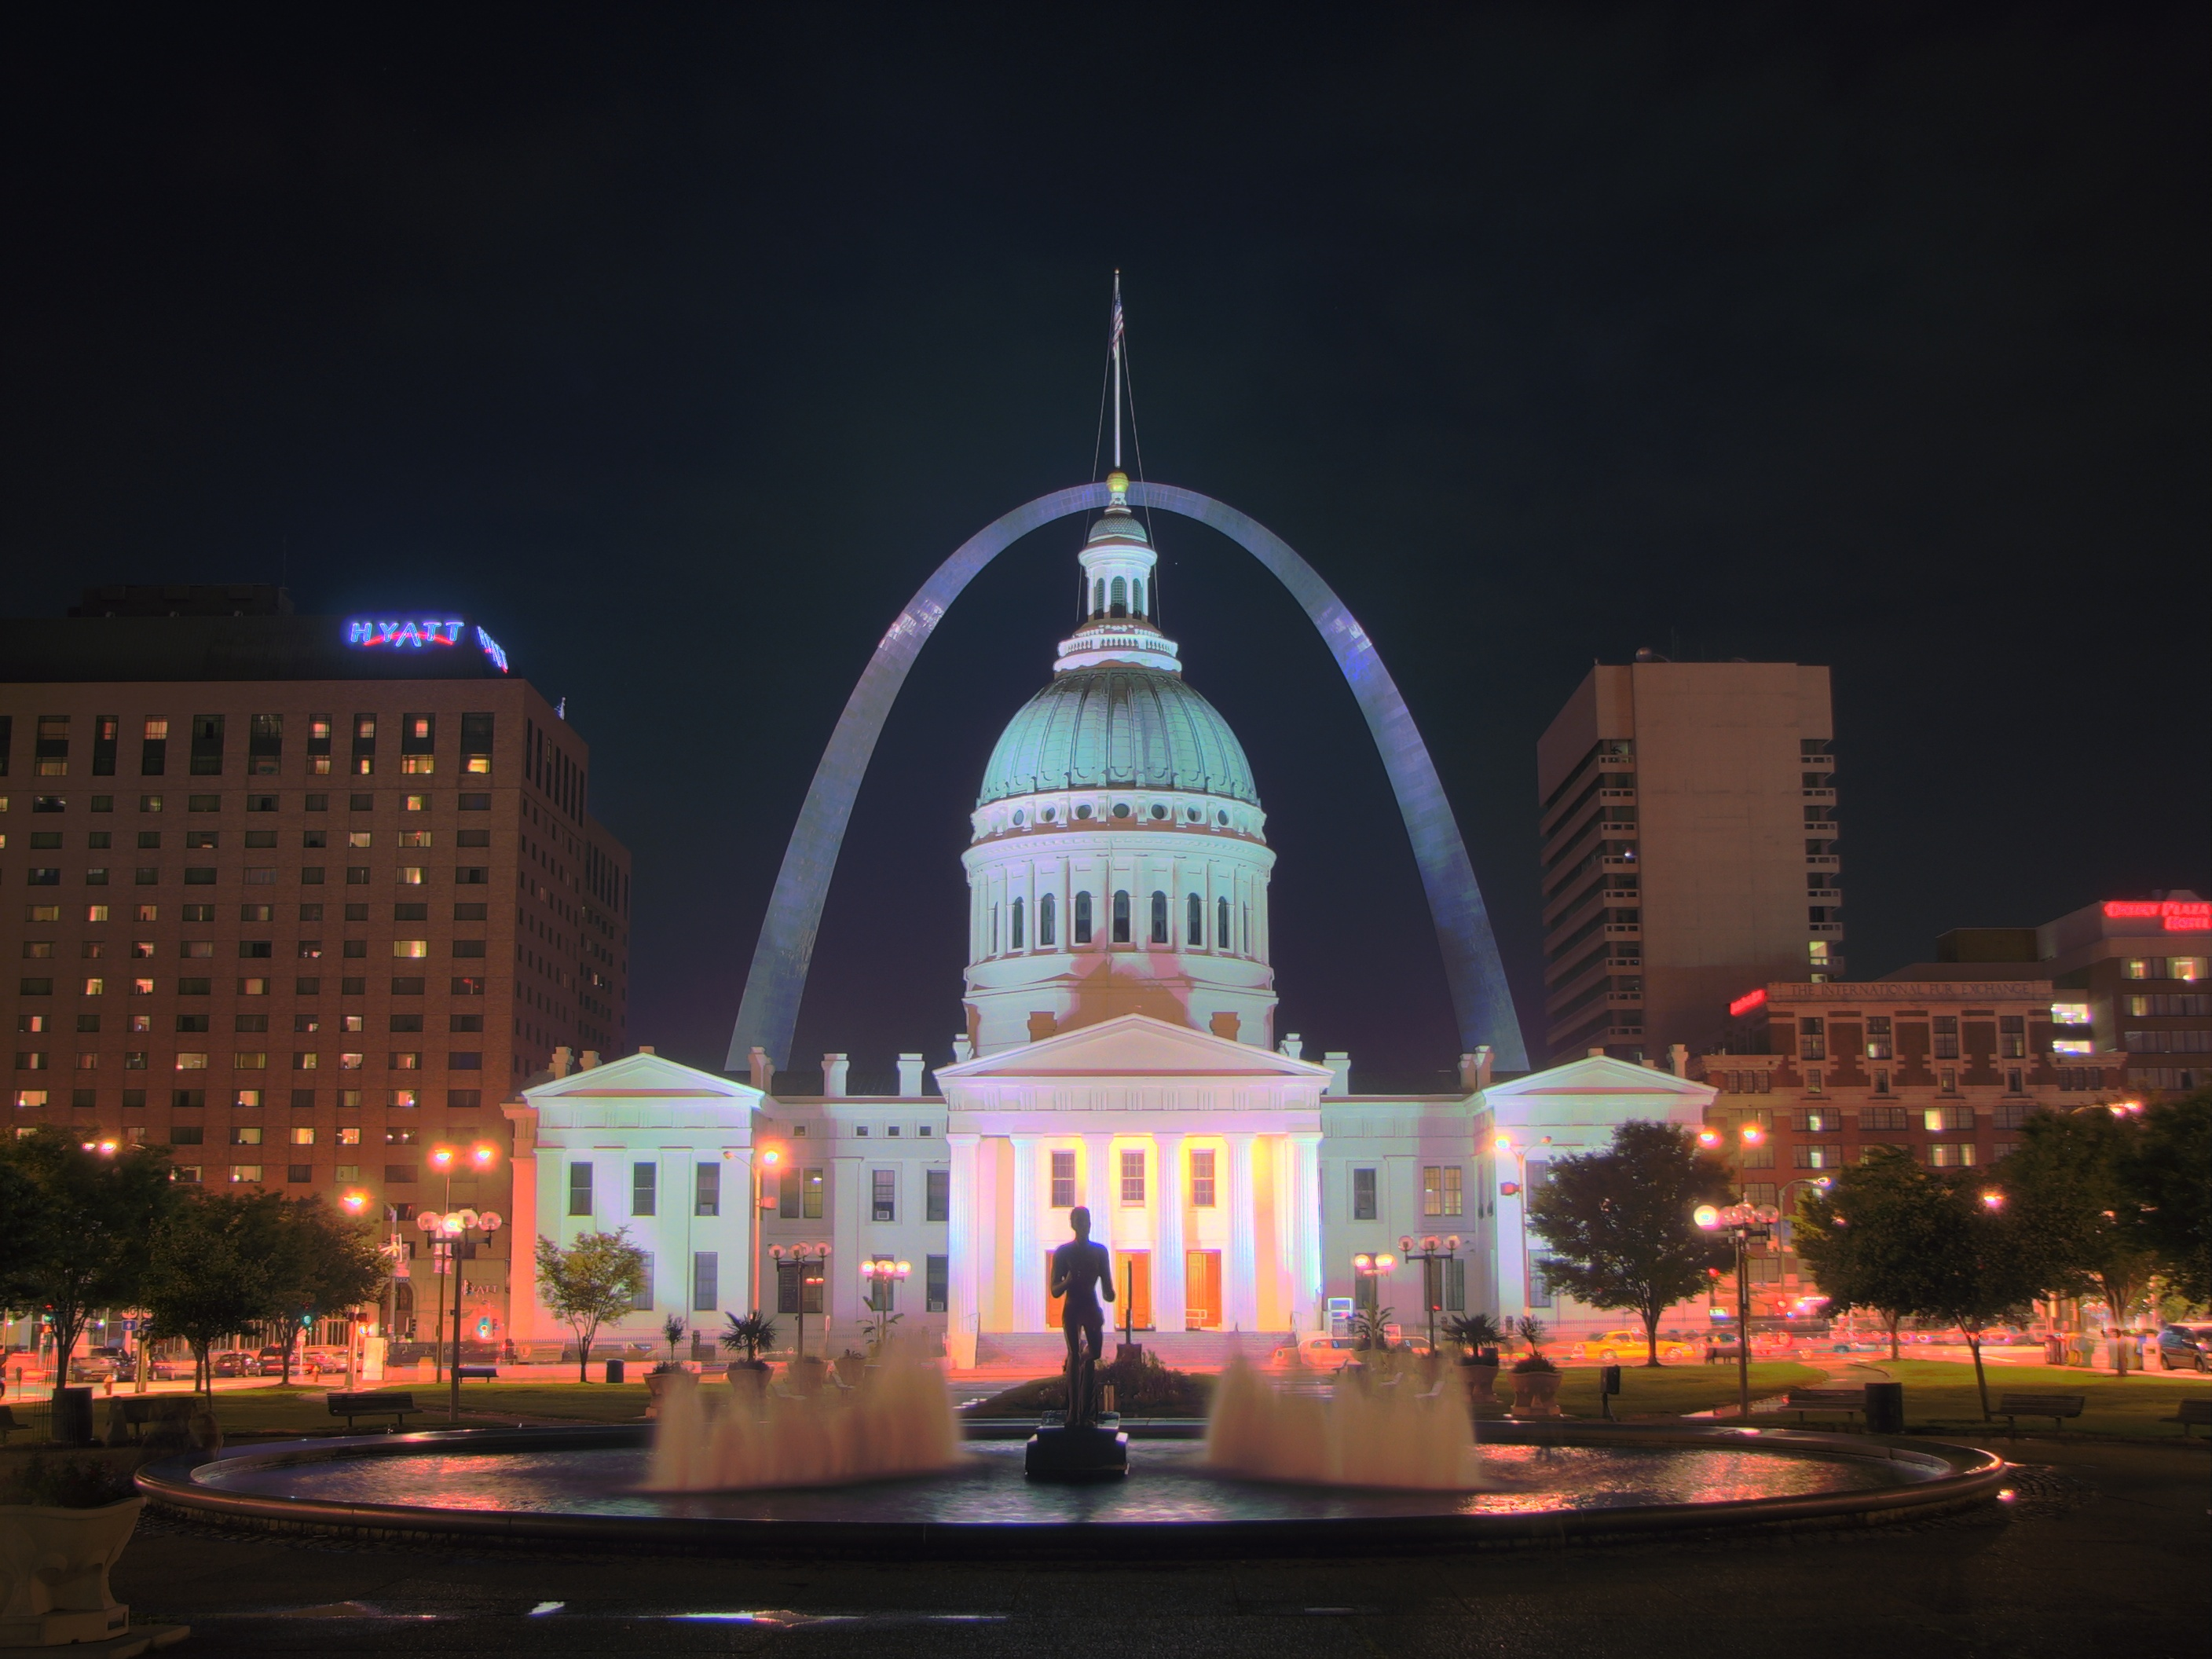

In [18]:
  # Tonemap using Drago's method to obtain 24-bit color image
  print("Tonemaping using Drago's method ... ")
  tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
  ldrDrago = tonemapDrago.process(hdrDebevec)
  ldrDrago = 3 * ldrDrago
  cv2.imwrite("ldr-Drago.jpg", ldrDrago * 255)
  print("saved ldr-Drago.jpg")
  Image(filename='ldr-Drago.jpg')

Tonemaping using Durand's method ... 
saved ldr-Durand.jpg


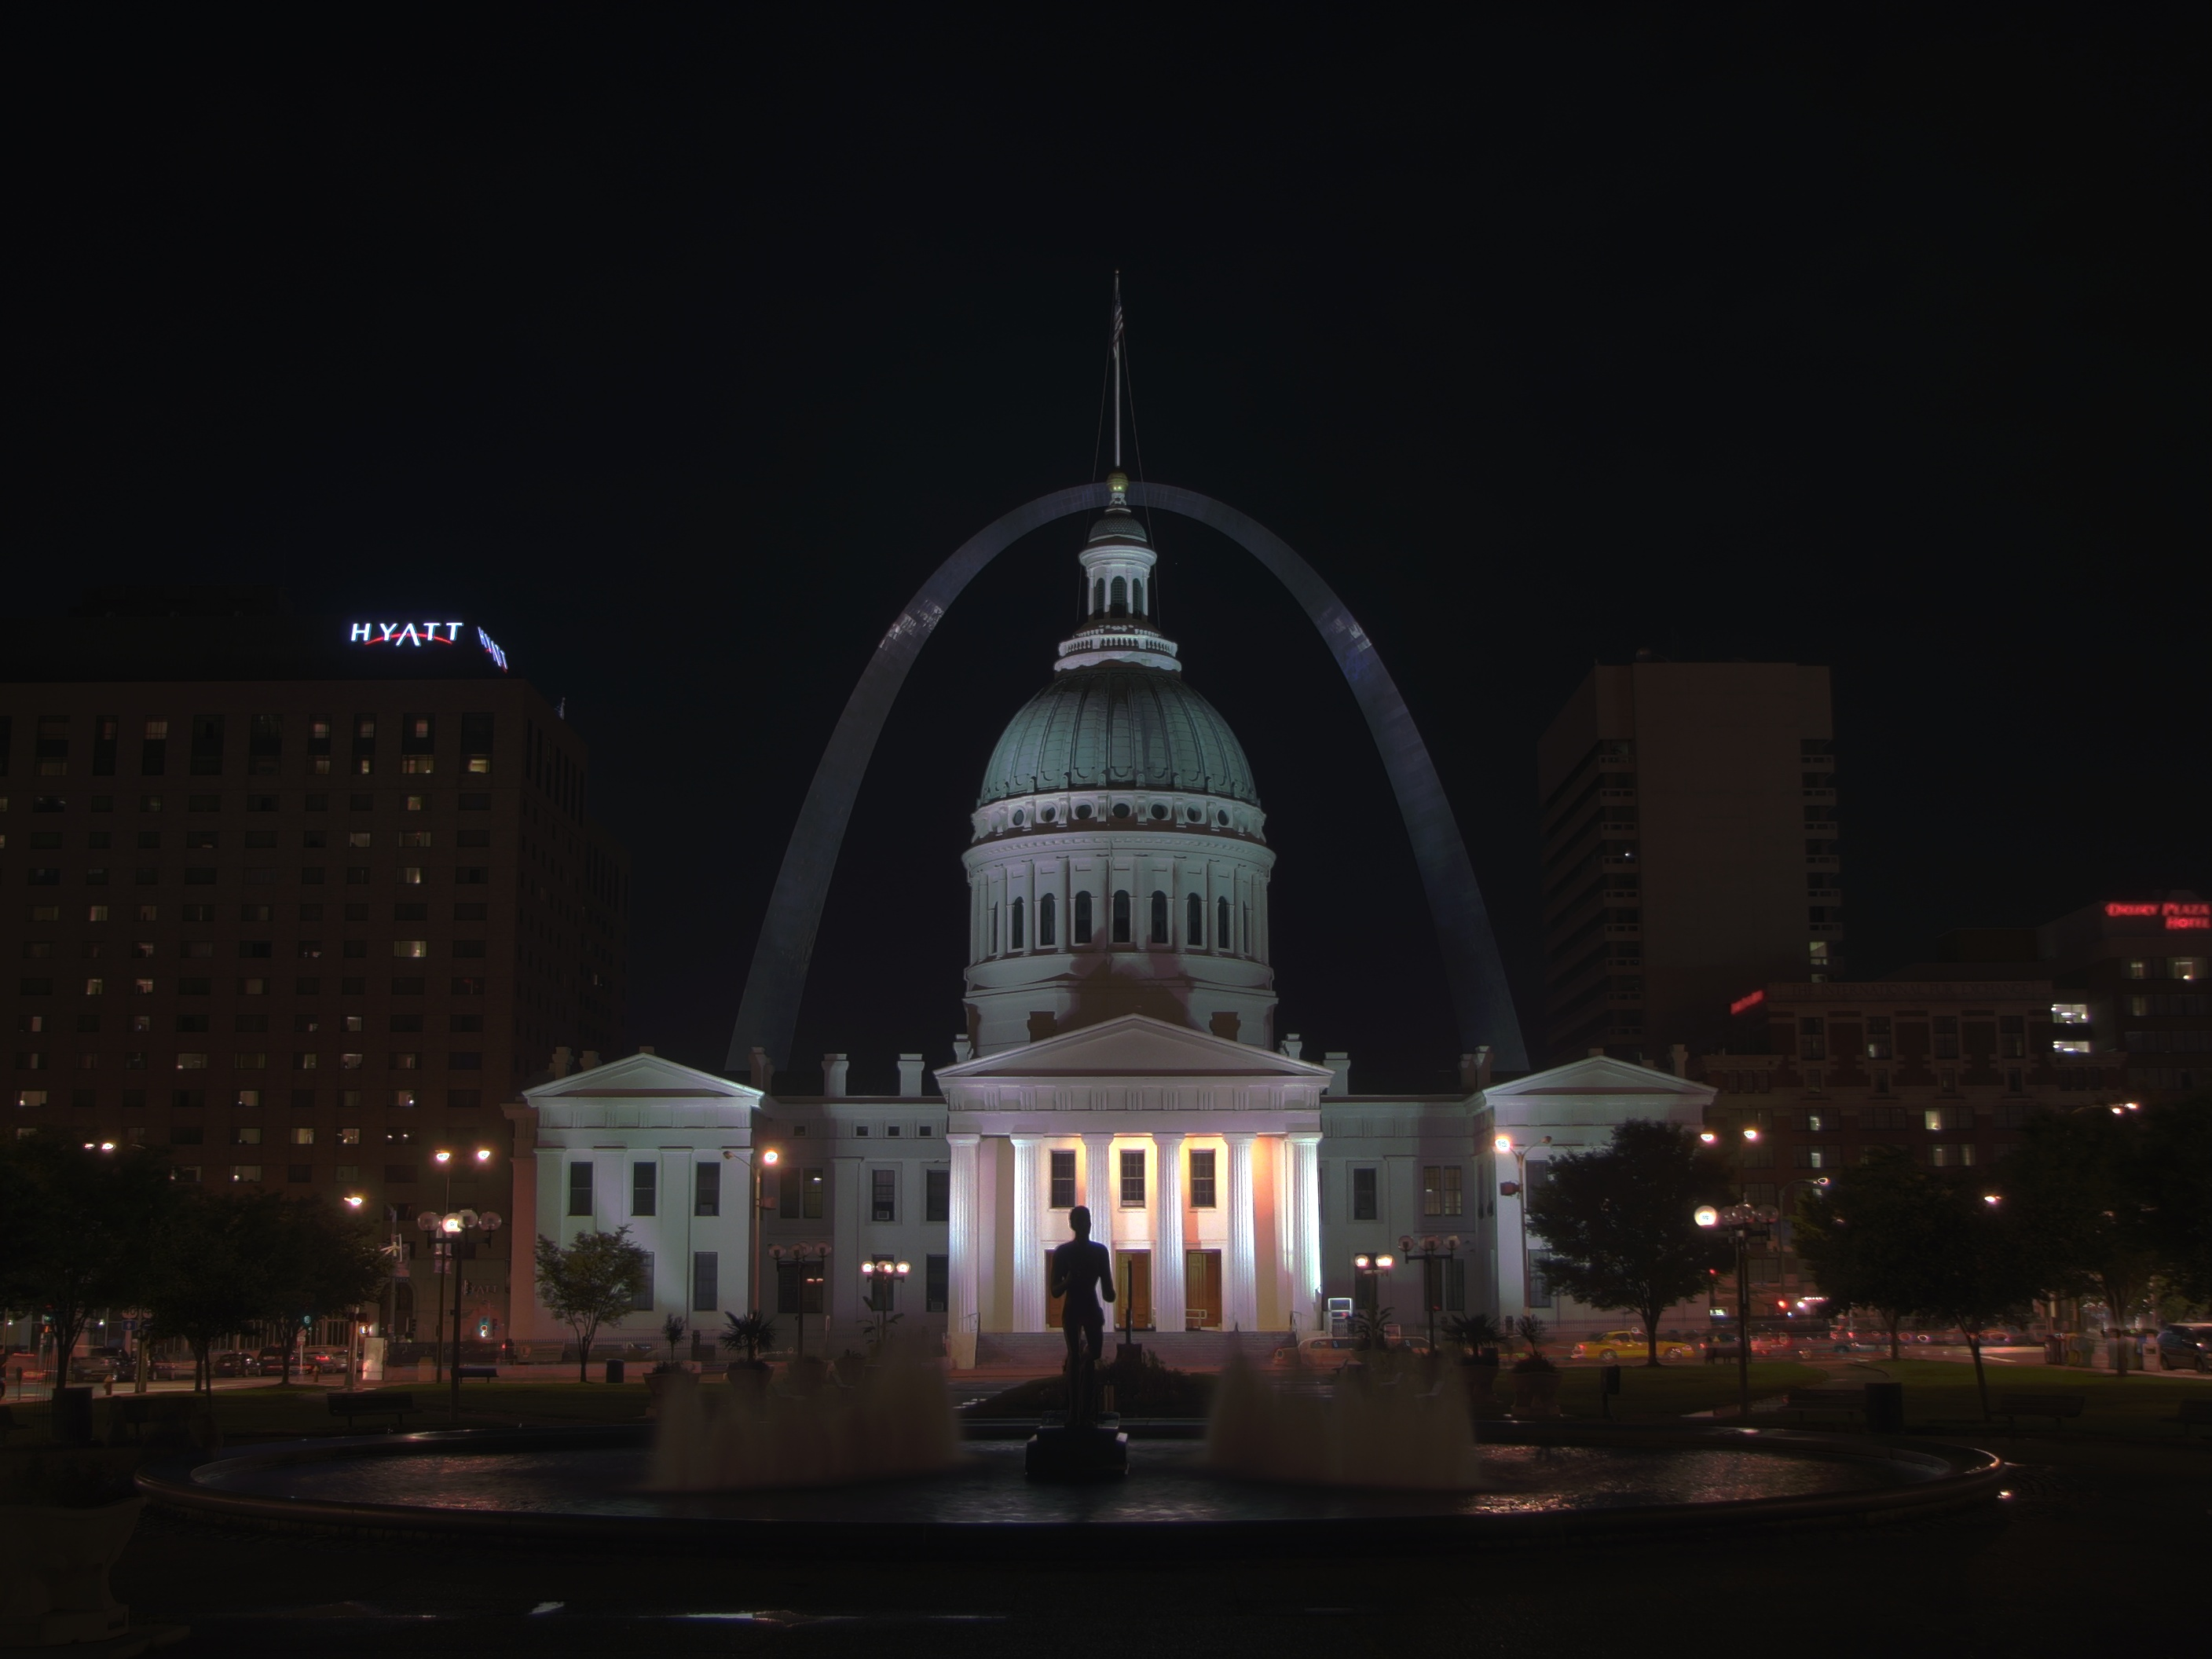

In [19]:
  # Tonemap using Durand's method obtain 24-bit color image
  print("Tonemaping using Durand's method ... ")
  tonemapDurand = cv2.createTonemap(2.2)
  ldrDurand = tonemapDurand.process(hdrDebevec)
  ldrDurand = 3 * ldrDurand
  cv2.imwrite("ldr-Durand.jpg", ldrDurand * 255)
  print("saved ldr-Durand.jpg")
  Image(filename='ldr-Durand.jpg')

Tonemaping using Reinhard's method ... 
saved ldr-Reinhard.jpg


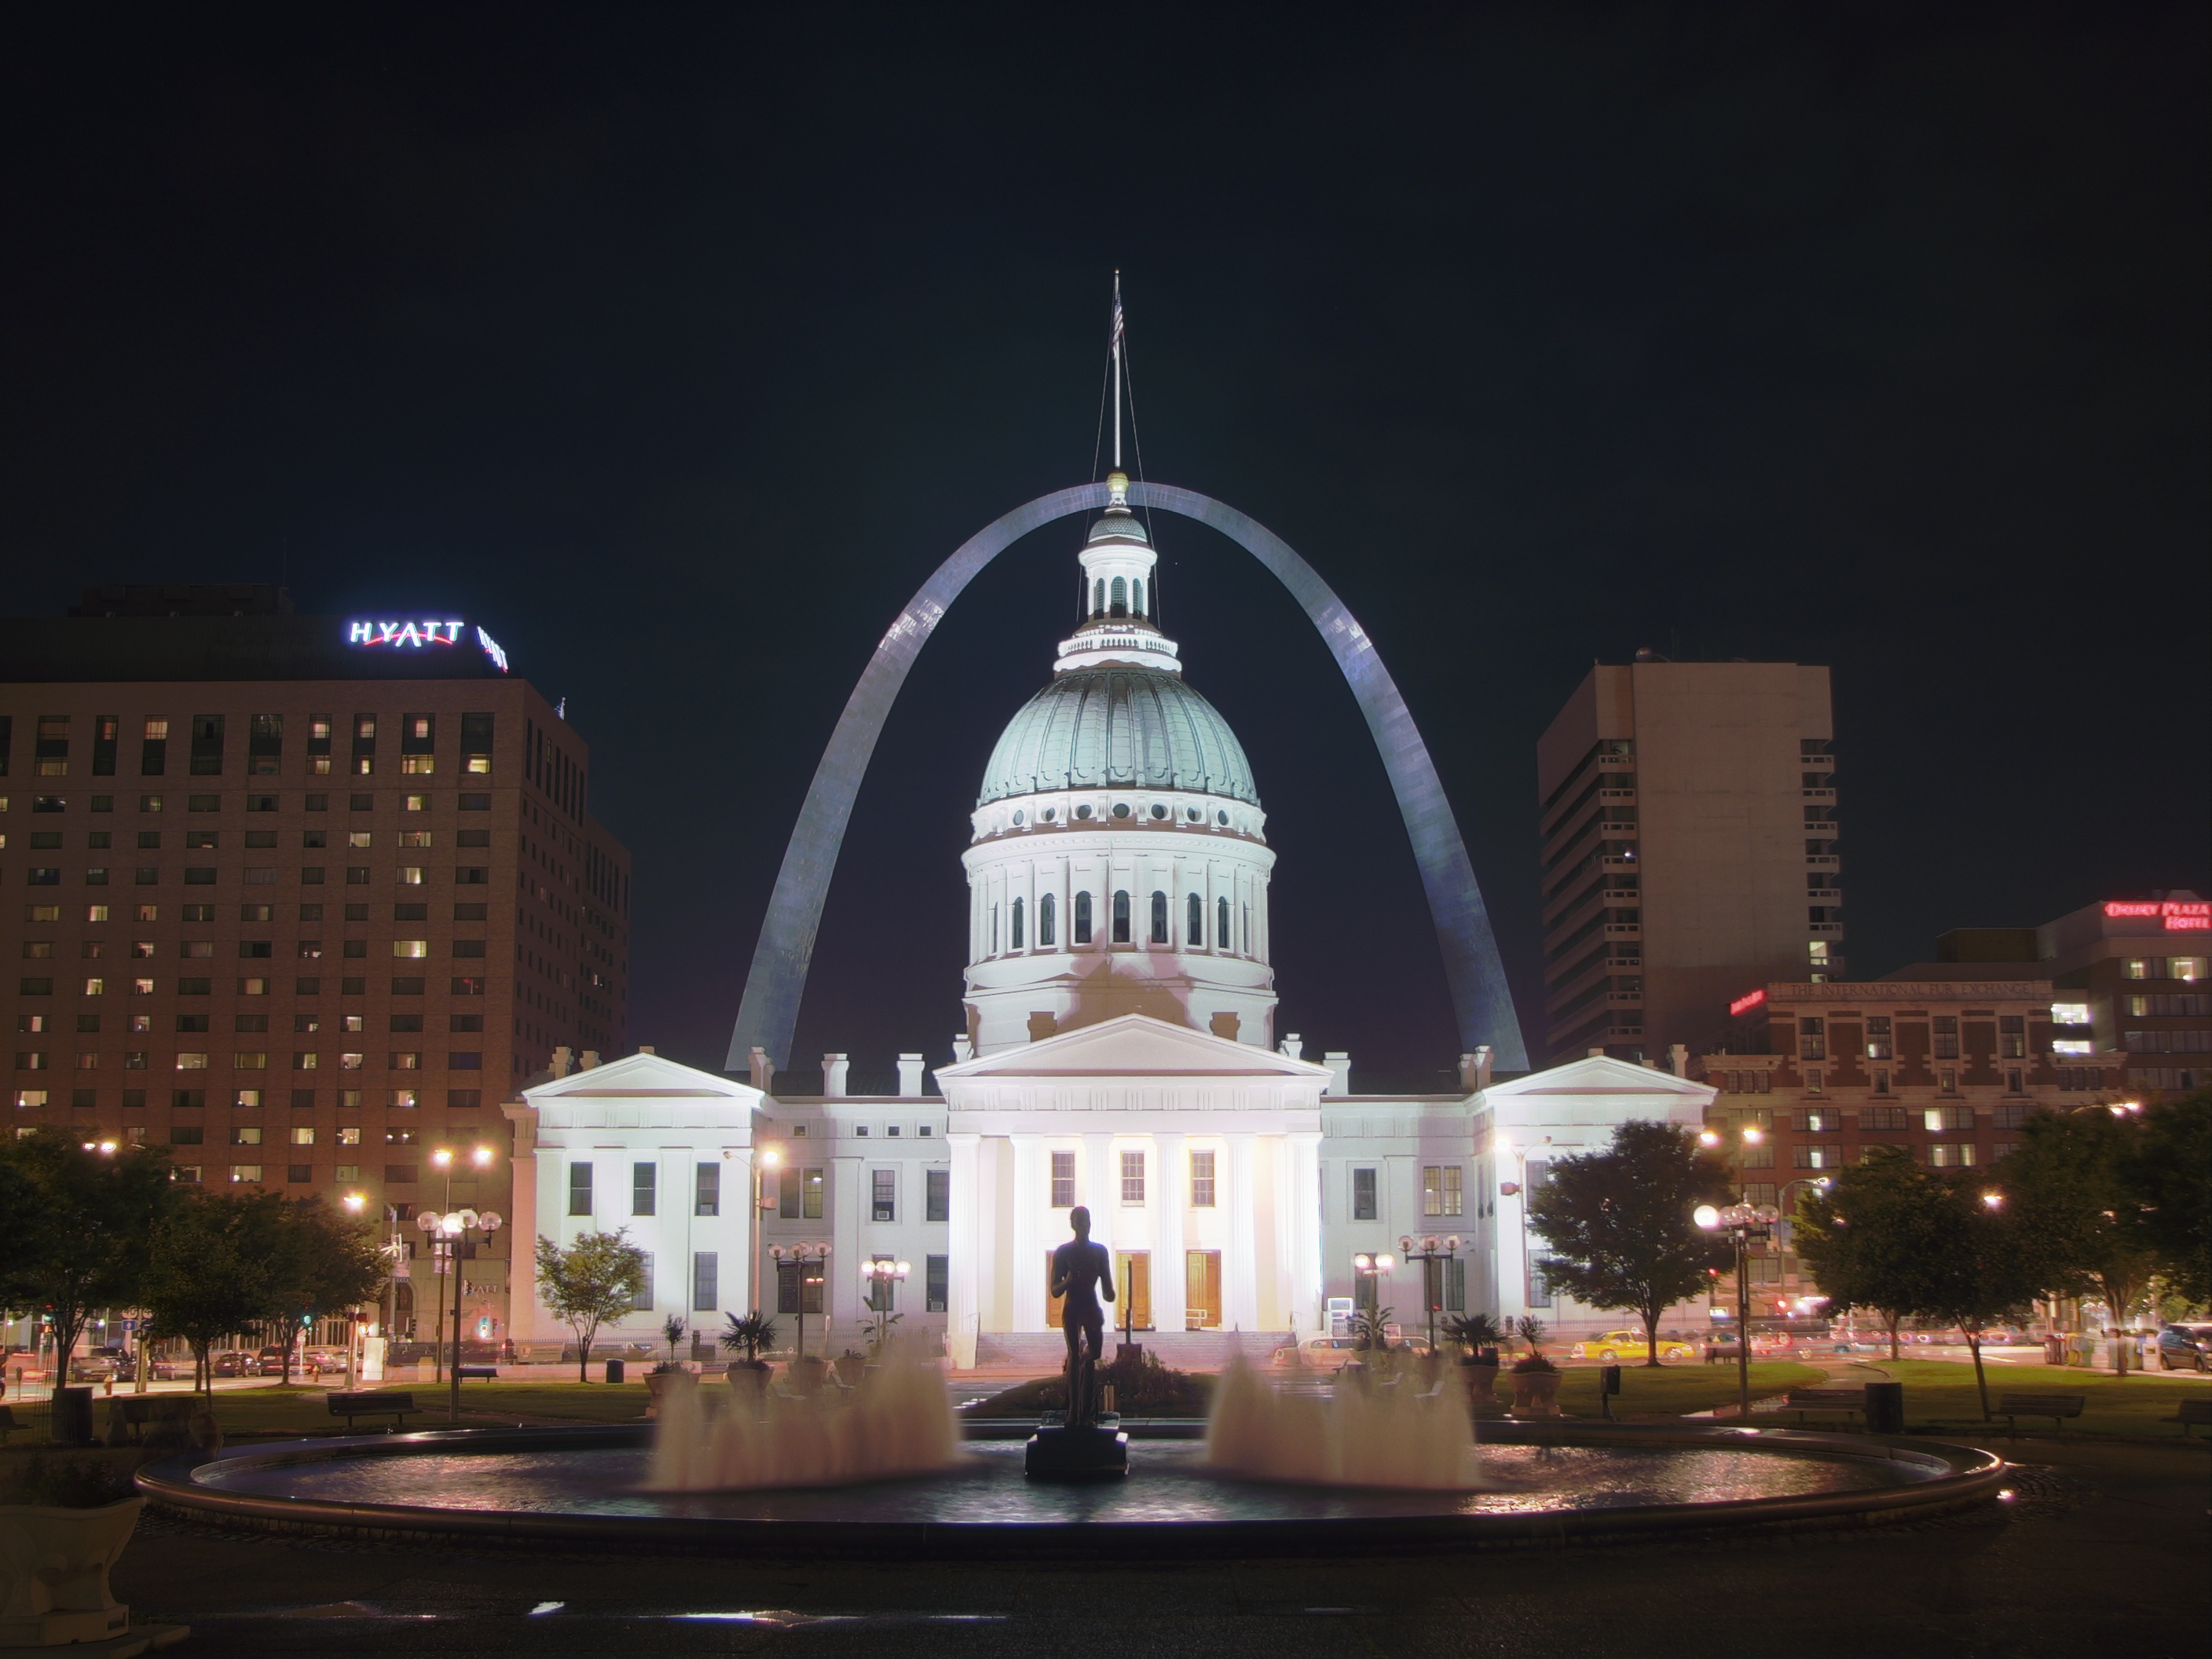

In [21]:
  # Tonemap using Reinhard's method to obtain 24-bit color image
  print("Tonemaping using Reinhard's method ... ")
  tonemapReinhard = cv2.createTonemapReinhard(1.5, 0,0,0)
  ldrReinhard = tonemapReinhard.process(hdrDebevec)
  cv2.imwrite("ldr-Reinhard.jpg", ldrReinhard * 255)
  print("saved ldr-Reinhard.jpg")
  Image(filename='ldr-Reinhard.jpg')

Tonemaping using Mantiuk's method ... 
saved ldr-Mantiuk.jpg


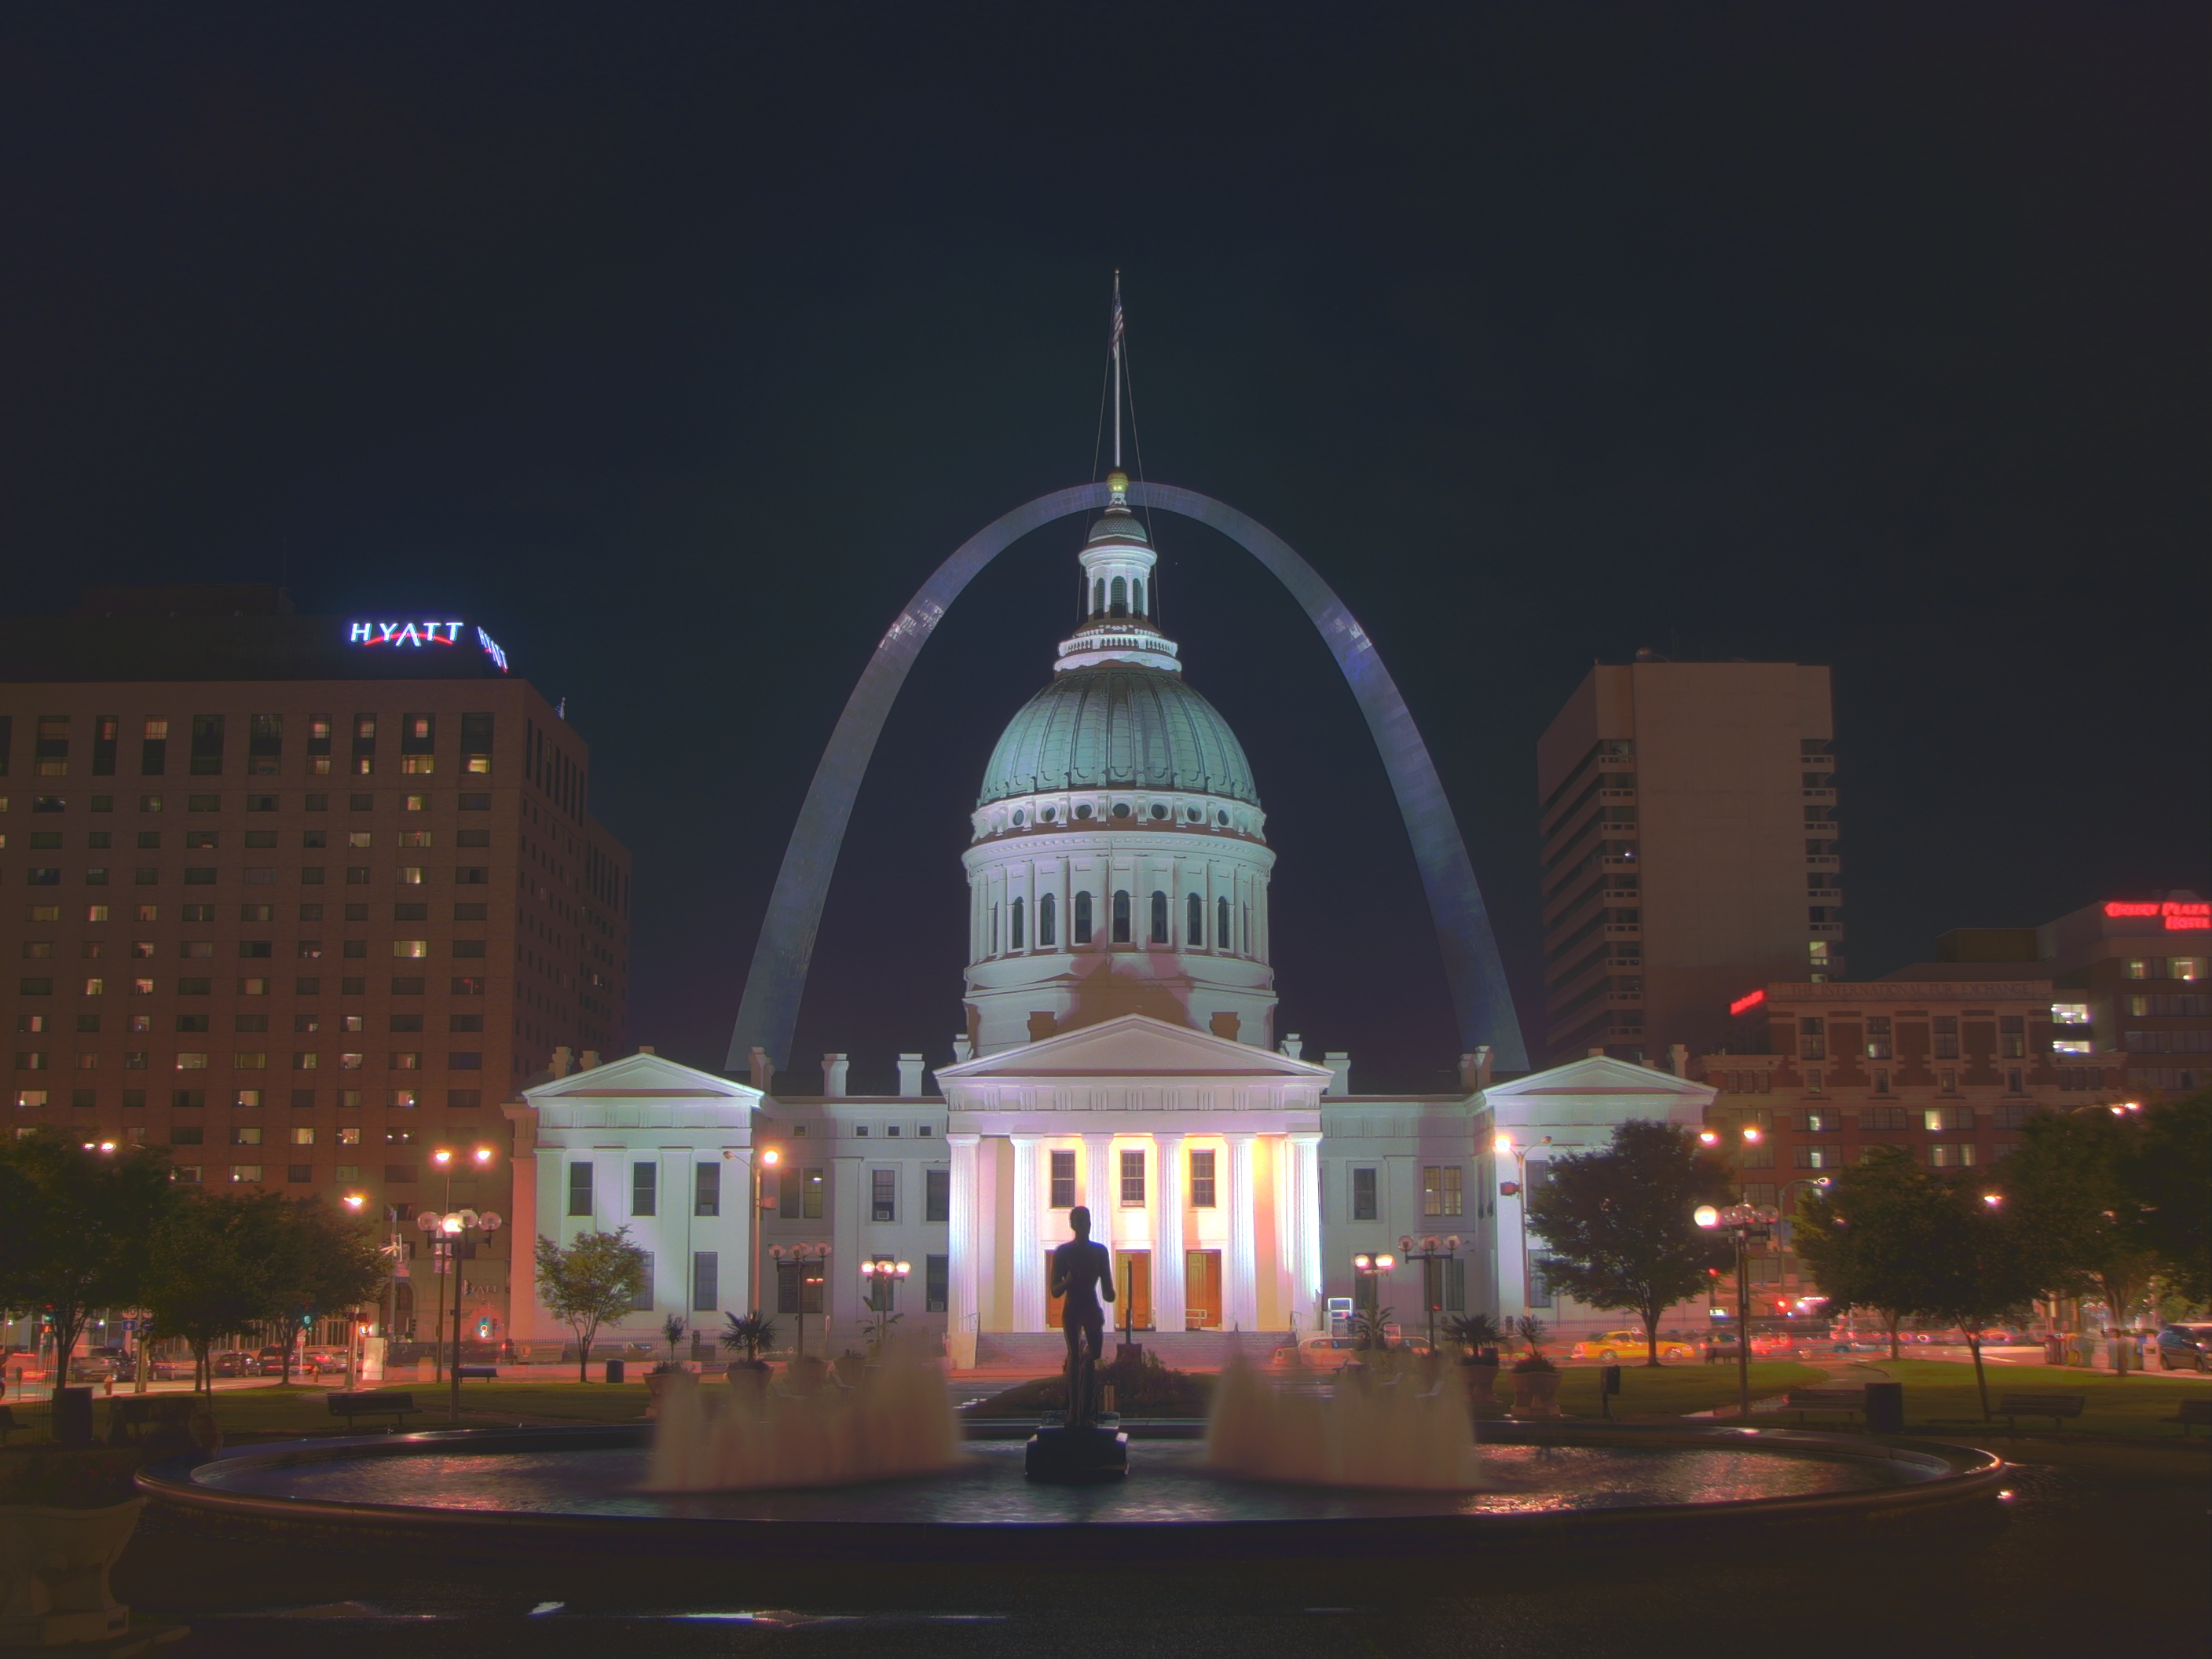

In [22]:
  # Tonemap using Mantiuk's method to obtain 24-bit color image
  print("Tonemaping using Mantiuk's method ... ")
  tonemapMantiuk = cv2.createTonemapMantiuk(2.2,0.85, 1.2)
  ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
  ldrMantiuk = 3 * ldrMantiuk
  cv2.imwrite("ldr-Mantiuk.jpg", ldrMantiuk * 255)
  print("saved ldr-Mantiuk.jpg")
  Image(filename='ldr-Mantiuk.jpg')